In [1]:
#import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
#loading the dataset
df = pd.read_csv('TSLA.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


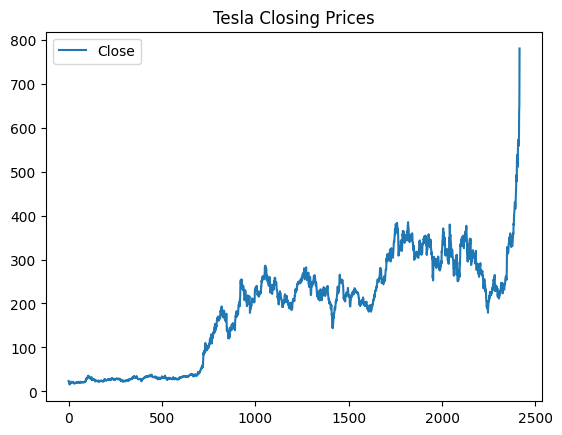

In [3]:
# Plot Tesla closing prices
df[['Close']].plot(title="Tesla Closing Prices")
plt.show()


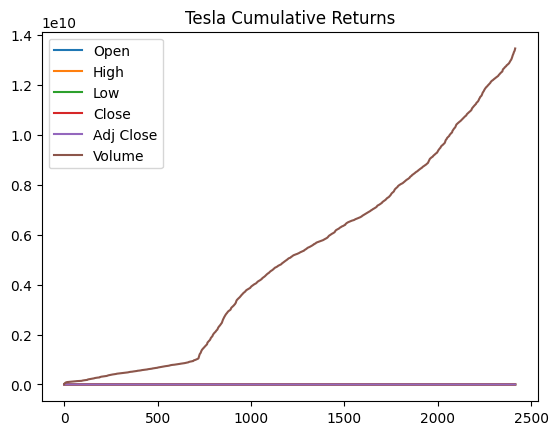

In [4]:
# Plot cumulative returns
df.cumsum().plot(title='Tesla Cumulative Returns')
plt.show()


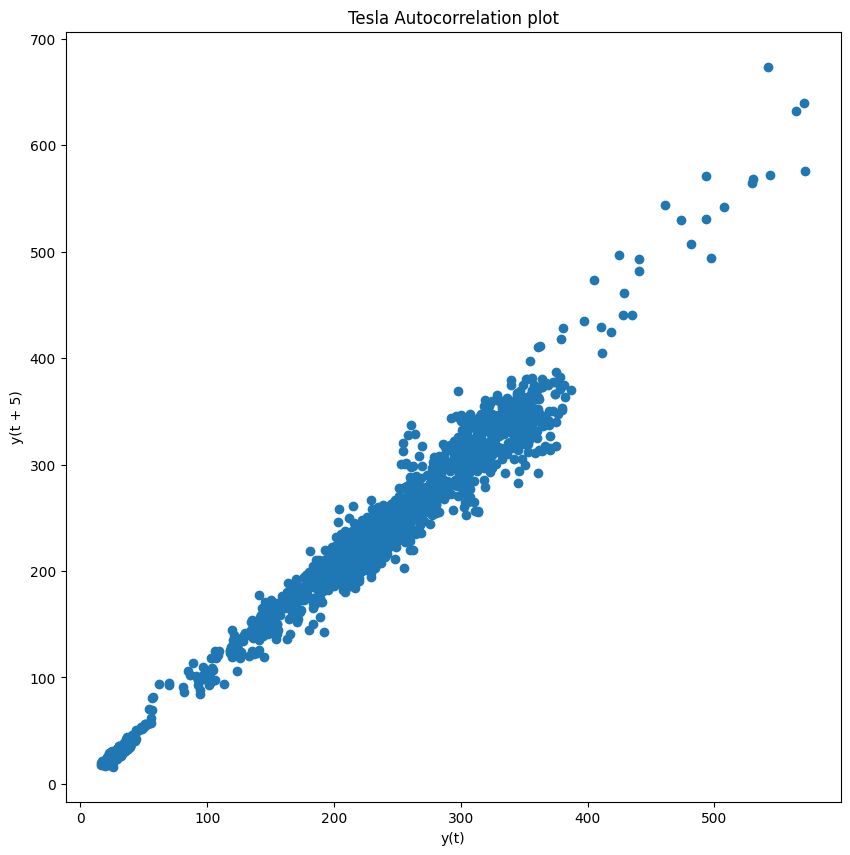

In [5]:
# Plot autocorrelation
plt.figure(figsize=(10, 10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')
plt.show()


In [6]:
# Train-test split
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

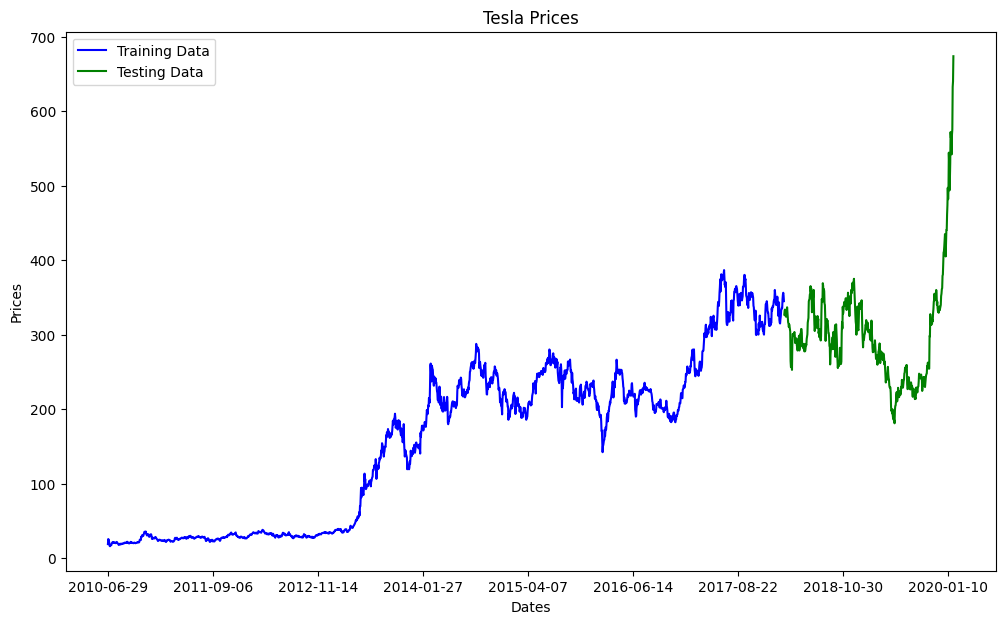

In [7]:
# Plot training and testing data
plt.figure(figsize=(12, 7))
plt.plot(train_data['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0, len(df), 300), df['Date'][0:len(df):300])
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()


In [10]:
# Prepare data for ARIMA model
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = list(train_ar)
predictions = []



In [16]:
# Fit ARIMA model and make predictions(Not working)
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 0))
    yhat = model.forecast()[0]
    predictions.append(yhat)
    history.append(test_ar[t])


AttributeError: 'ARIMA' object has no attribute 'forecast'

In [14]:
# Calculate errors(Not working)
error = mean_squared_error(test_ar, predictions)
error2 = smape_kun(test_ar, predictions)
print(f'Testing Mean Squared Error: {error:.3f}')
print(f'Symmetric Mean Absolute Percentage Error: {error2:.3f}')

# Plot predictions vs actual prices
plt.figure(figsize=(12, 7))
plt.plot(train_data['Open'], 'blue', label='Training Data')
plt.plot(test_data.index, predictions, 'green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], 'red', label='Actual Price')
plt.xticks(np.arange(0, len(df), 300), df['Date'][0:len(df):300])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(test_data.index, predictions, 'green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], 'red', label='Actual Price')
plt.xticks(np.arange(len(train_data), len(df), 60), df['Date'][len(train_data):len(df):60])
plt.title('Tesla Prices Prediction (Testing Period)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [484, 758]